In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from keras.callbacks import EarlyStopping
import tensorflow as tf
from numpy import array
from google.colab import drive
import seaborn as sns
import numpy
from tensorflow.keras.optimizers import Adam
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/Project TA

/content/drive/My Drive/Project TA


In [ ]:
ls

 30daypredict.png                         JKII_5years.csv
 ACES.JK.csv                              JKII_5years_normalized.csv
 AHAP.JK.csv                              JKII_Covid.csv
 ALKA.JK.csv                             '^JKII.csv'
 ALMI.JK.csv                              JKII.csv
'BBRI.JK (3).csv'                        'KAYU.JK (1).csv'
 dataprediksisaham30harikedepanasli.csv   KAYU.JK.csv
 dataprediksisaham30harikedepan.csv       PFE.csv
 dataprediksisaham.csv                    TLKM.JK.csv
'GDST.JK (1).csv'                        'Video Presentasi Laporan TA.mp4'
 GDST.JK.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Preprosessing Data

In [ ]:
df = pd.read_csv('JKII_Covid.csv')
df.head()
data = df.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume
1,2019-01-02,685.409973,687.739990,682.400024,684.919983,684.919983,4.494000e+08
2,2019-01-03,685.210022,695.299988,685.210022,695.299988,695.299988,7.735000e+08
3,2019-01-04,692.369995,701.739990,691.479980,701.739990,701.739990,9.954000e+08
4,2019-01-07,708.109985,713.150024,704.109985,704.109985,704.109985,1.043000e+09
5,2019-01-08,704.520020,707.460022,694.359985,698.650024,698.650024,9.771000e+08
...,...,...,...,...,...,...,...
803,2022-03-25,590.190002,590.239990,581.080017,584.150024,584.150024,1.591400e+09
804,2022-03-28,584.289978,590.909973,583.469971,589.789978,589.789978,1.927200e+09
805,2022-03-29,590.650024,592.440002,586.500000,586.609985,586.609985,1.753500e+09
806,2022-03-30,589.690002,592.419983,588.539978,591.760010,591.760010,2.380300e+09


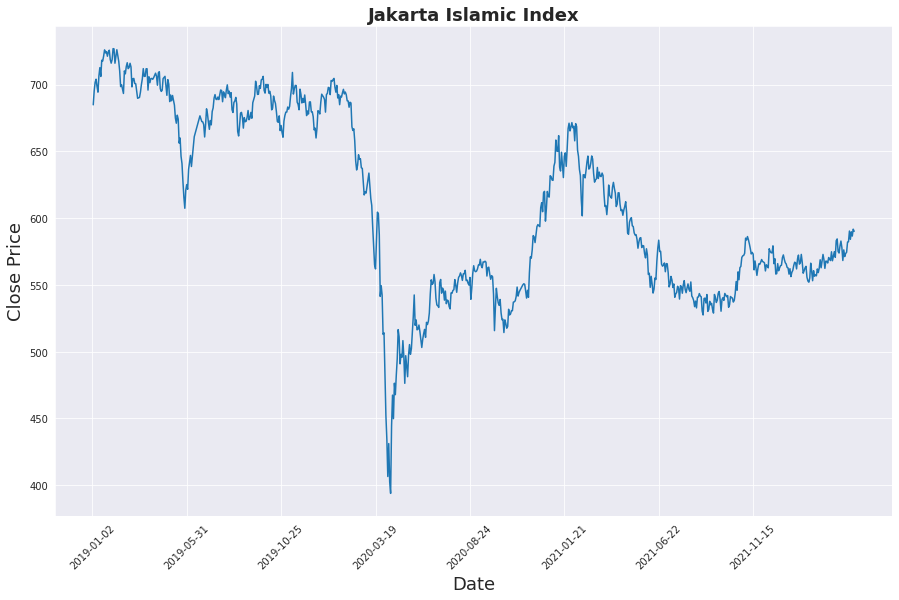

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data[['Close']])
plt.xticks(range(0,data.shape[0],100),data['Date'].loc[::100],rotation=45)
plt.title("Jakarta Islamic Index",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [ ]:
data=data.reset_index()['Close']
data

0      684.919983
1      695.299988
2      701.739990
3      704.109985
4      698.650024
          ...    
790    584.150024
791    589.789978
792    586.609985
793    591.760010
794    590.169983
Name: Close, Length: 795, dtype: float64

Normalisasi Data


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [ ]:
data

array([[0.87366044],
       [0.90481759],
       [0.92414823],
       [0.93126212],
       [0.91487323],
       [0.90211621],
       [0.93864625],
       [0.95722648],
       [0.93738561],
       [0.97382551],
       [0.9719645 ],
       [0.98325074],
       [0.99720849],
       [0.99036464],
       [0.99324629],
       [0.98289056],
       [0.99267596],
       [0.99642803],
       [0.97562661],
       [0.96731198],
       [0.97520634],
       [1.        ],
       [0.99939963],
       [0.96719198],
       [0.99750858],
       [0.98511175],
       [0.97151437],
       [0.95005249],
       [0.91466309],
       [0.9186852 ],
       [0.90880984],
       [0.89920452],
       [0.94990244],
       [0.94329877],
       [0.9598379 ],
       [0.96830257],
       [0.95497524],
       [0.95764675],
       [0.96704193],
       [0.95866721],
       [0.91388263],
       [0.93237272],
       [0.93294304],
       [0.92156685],
       [0.92093644],
       [0.88830851],
       [0.88917911],
       [0.890

Splitting Data 70% Data training dan 30% Data Testing

In [ ]:
##splitting dataset into train and test split
training_size=int(len(data)*0.7)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]

In [ ]:
training_size,test_size

(556, 239)

In [ ]:
train_data

array([[0.87366044],
       [0.90481759],
       [0.92414823],
       [0.93126212],
       [0.91487323],
       [0.90211621],
       [0.93864625],
       [0.95722648],
       [0.93738561],
       [0.97382551],
       [0.9719645 ],
       [0.98325074],
       [0.99720849],
       [0.99036464],
       [0.99324629],
       [0.98289056],
       [0.99267596],
       [0.99642803],
       [0.97562661],
       [0.96731198],
       [0.97520634],
       [1.        ],
       [0.99939963],
       [0.96719198],
       [0.99750858],
       [0.98511175],
       [0.97151437],
       [0.95005249],
       [0.91466309],
       [0.9186852 ],
       [0.90880984],
       [0.89920452],
       [0.94990244],
       [0.94329877],
       [0.9598379 ],
       [0.96830257],
       [0.95497524],
       [0.95764675],
       [0.96704193],
       [0.95866721],
       [0.91388263],
       [0.93237272],
       [0.93294304],
       [0.92156685],
       [0.92093644],
       [0.88830851],
       [0.88917911],
       [0.890

In [ ]:
test_data

array([[0.60960532],
       [0.61701931],
       [0.61996105],
       [0.60156092],
       [0.60009014],
       [0.58574216],
       [0.58084945],
       [0.58169   ],
       [0.57097409],
       [0.55122318],
       [0.56542092],
       [0.57403565],
       [0.57502625],
       [0.55266391],
       [0.55719643],
       [0.55653616],
       [0.53924662],
       [0.5295213 ],
       [0.55005249],
       [0.53627502],
       [0.49227071],
       [0.49503236],
       [0.46330489],
       [0.48803847],
       [0.47050874],
       [0.45039765],
       [0.45919265],
       [0.48416622],
       [0.48095461],
       [0.52156685],
       [0.55125322],
       [0.56935308],
       [0.54377914],
       [0.54419923],
       [0.51532337],
       [0.51088099],
       [0.51307213],
       [0.51811488],
       [0.49836415],
       [0.51661406],
       [0.51616392],
       [0.49662314],
       [0.4642354 ],
       [0.47065879],
       [0.48782833],
       [0.47963388],
       [0.46294471],
       [0.470

Konversi Data ke dalam bentuk Matriks

In [ ]:


def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

Reshape data sesuai input yang dibutuhkan di dalam LSTM 

In [ ]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 39
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train.shape), print(y_train.shape)

(516, 39)
(516,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)

(199, 39)
(199,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
x_train

array([[0.87366044, 0.90481759, 0.92414823, ..., 0.95497524, 0.95764675,
        0.96704193],
       [0.90481759, 0.92414823, 0.93126212, ..., 0.95764675, 0.96704193,
        0.95866721],
       [0.92414823, 0.93126212, 0.91487323, ..., 0.96704193, 0.95866721,
        0.91388263],
       ...,
       [0.72919098, 0.73162231, 0.74227831, ..., 0.62527385, 0.63707031,
        0.64517481],
       [0.73162231, 0.74227831, 0.75866721, ..., 0.63707031, 0.64517481,
        0.65577072],
       [0.74227831, 0.75866721, 0.75188345, ..., 0.64517481, 0.65577072,
        0.63088692]])

In [ ]:
y_train

array([0.95866721, 0.91388263, 0.93237272, 0.93294304, 0.92156685,
       0.92093644, 0.88830851, 0.88917911, 0.89031957, 0.90220617,
       0.91907543, 0.93219263, 0.95500529, 0.93759557, 0.93765566,
       0.9546451 , 0.95473506, 0.90676874, 0.93666506, 0.92342786,
       0.93258286, 0.93300313, 0.93105199, 0.93474414, 0.94476955,
       0.93813602, 0.91772465, 0.9457301 , 0.94813139, 0.90998053,
       0.90379713, 0.90634846, 0.93264295, 0.9376857 , 0.89500232,
       0.93024167, 0.91994603, 0.88089452, 0.89572269, 0.88278558,
       0.89464195, 0.87294008, 0.84415435, 0.83229779, 0.8503676 ,
       0.84145279, 0.78754307, 0.79906949, 0.75800694, 0.74149786,
       0.70109557, 0.66600627, 0.64106256, 0.68146484, 0.69431181,
       0.68371608, 0.72868075, 0.7446796 , 0.7598379 , 0.73498414,
       0.75800694, 0.80198101, 0.84886678, 0.84268339, 0.83592967,
       0.83532949, 0.829206  , 0.80138083, 0.82875586, 0.86465549,
       0.85312925, 0.83379862, 0.81852013, 0.838361  , 0.82857

# Modelling

In [ ]:
from tensorflow.keras.optimizers import Adam

#model=Sequential()
#model.add(LSTM(65,return_sequences=True,input_shape=(128,1)))
#model.add(LSTM(50,return_sequences=True))
#model.add(LSTM(64))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error',optimizer= Adam(lr=0.000001))

In [ ]:
model = Sequential()
model.add(SimpleRNN(16, input_shape=(39,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 16)                288       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


Proseng tuning Model

In [ ]:
h= model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=35,verbose=1)

Epoch 1/100
15/15 [==============================] - 3s 39ms/step - loss: 0.0371 - val_loss: 0.0021
Epoch 2/100
15/15 [==============================] - 0s 24ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 3/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0018 - val_loss: 4.1878e-04
Epoch 4/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0012 - val_loss: 4.5970e-04
Epoch 5/100
15/15 [==============================] - 0s 24ms/step - loss: 0.0011 - val_loss: 5.4789e-04
Epoch 6/100
15/15 [==============================] - 0s 27ms/step - loss: 0.0010 - val_loss: 3.4414e-04
Epoch 7/100
15/15 [==============================] - 0s 24ms/step - loss: 9.9953e-04 - val_loss: 3.0380e-04
Epoch 8/100
15/15 [==============================] - 0s 24ms/step - loss: 9.3613e-04 - val_loss: 2.9283e-04
Epoch 9/100
15/15 [==============================] - 0s 25ms/step - loss: 9.4197e-04 - val_loss: 3.1878e-04
Epoch 10/100
15/15 [==============================] - 0s 25m

# Prediksi Dan Visualisasi

In [ ]:
import tensorflow as tf

Membuat variabel prediksi train dan test

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

7/7 [==============================] - 0s 4ms/step


Mengembalikan data kedalam bentuk sebelum dilakukan Normalisasi

In [ ]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
Ytest = scaler.inverse_transform([y_test])
Ytrain = scaler.inverse_transform([y_train])




Melakukukan pengecekan Loss dengan RMSE dan MAPE

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


627.6285875446297

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(Ytest[0],test_predict))


6.294640340446157

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
math.sqrt(mean_absolute_percentage_error(Ytest[0],test_predict))

0.09529849358369216

In [ ]:
print("mape {}%".format(a*100))

NameError: ignored

Visualisasi Loss 

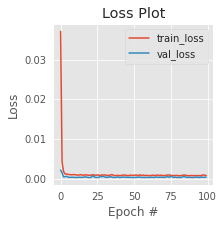

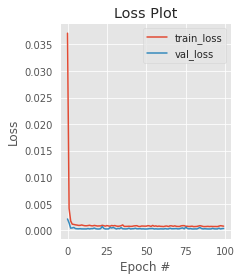

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

plt.subplot2grid((4, 4), (1, 0), rowspan=4, colspan=2)
plt.plot(np.arange(0, 100), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), h.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.subplot2grid((4, 4), (0, 2), rowspan=4, colspan=2)
plt.plot(np.arange(0, 100), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), h.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'Los.svg'

Pembuatan variabel untuk visualisasi data for prediksi

In [ ]:
original= scaler.inverse_transform(data)

In [ ]:
look_back=39
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict

In [ ]:
predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [ ]:
trainPredictPlot

In [ ]:
result

In [ ]:
result.to_csv('dataprediksisaham.csv')

Visualisasi data training dan test untuk prediksi

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
    ),
    showlegend=True,
    template = 'plotly_white'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()


Pembuatan variabel untuk memprediksi di kemudian hari

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[200:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=39
i=0
while(i<30):
    
    if(len(temp_input)>39):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
prediksi = pd.DataFrame(lst_output)
prediksi.to_csv('dataprediksisaham30harikedepan.csv')

In [ ]:
day_new=np.arange(1,40)
day_pred=np.arange(40,70)

In [ ]:
scaler.inverse_transform(lst_output)

In [ ]:
len(data)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(data[756:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

In [ ]:

plt.plot(scaler.inverse_transform(lst_output))
plt.ylabel('Close Price',fontsize=18)
plt.savefig('30daypredict.png')

In [ ]:
prediksi30hariasli = pd.DataFrame(scaler.inverse_transform(lst_output))
prediksi30hariasli.to_csv('dataprediksisaham30harikedepanasli.csv')
